In [1]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')
    sys.path.append('..')
from analysis import collection, analysis, emg, plot, model
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches, lines
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from joblib import dump, load
from analysis.offsets import offsets

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'axes.labelsize': 16})
mpl.rcParams.update({'figure.figsize': (16*0.8,9*0.8)})
mpl.rcParams.update({'axes.facecolor': "white"})
mpl.rcParams.update({'lines.marker': "+"})
mpl.rcParams.update({'lines.linestyle': ""})
mpl.rcParams.update({"axes.spines.left":   True})
mpl.rcParams.update({"axes.spines.bottom": True})
mpl.rcParams.update({"axes.spines.top":    False})
mpl.rcParams.update({"axes.spines.right":  False})

image_path = Path("/Users/spencer/phd/phd/images/more_results/gmms/")

%matplotlib inline

In [2]:
subjects = analysis.load_subjects()

In [3]:
import pandas as pd
trajectory_df = pd.read_pickle("../trajectory_dataframe.pkl")
mean_rewards = 1 / trajectory_df.groupby(level=['subject']).mean()["reward"]

## calibration, movement --> trial 0

In [36]:
movement_trial_distances = []
calibration_trial_distances = []
for subject_idx in range(len(subjects)):
    movement_model = model.load_log_movement_models(subject_idx)[0]
    calibration_model = model.load_log_calibration_models(subject_idx)[0]
    trial_model0 = model.load_log_trial_models(subject_idx)[0]

    model1 = movement_model
    model2 = trial_model0
    movement_trial_distances.append(model.gmm_wasserstein(model1.weights_,model2.weights_,model1.means_,model2.means_,model1.covariances_,model2.covariances_))

    model1 = calibration_model
    model2 = trial_model0
    calibration_trial_distances.append(model.gmm_wasserstein(model1.weights_,model2.weights_,model1.means_,model2.means_,model1.covariances_,model2.covariances_))


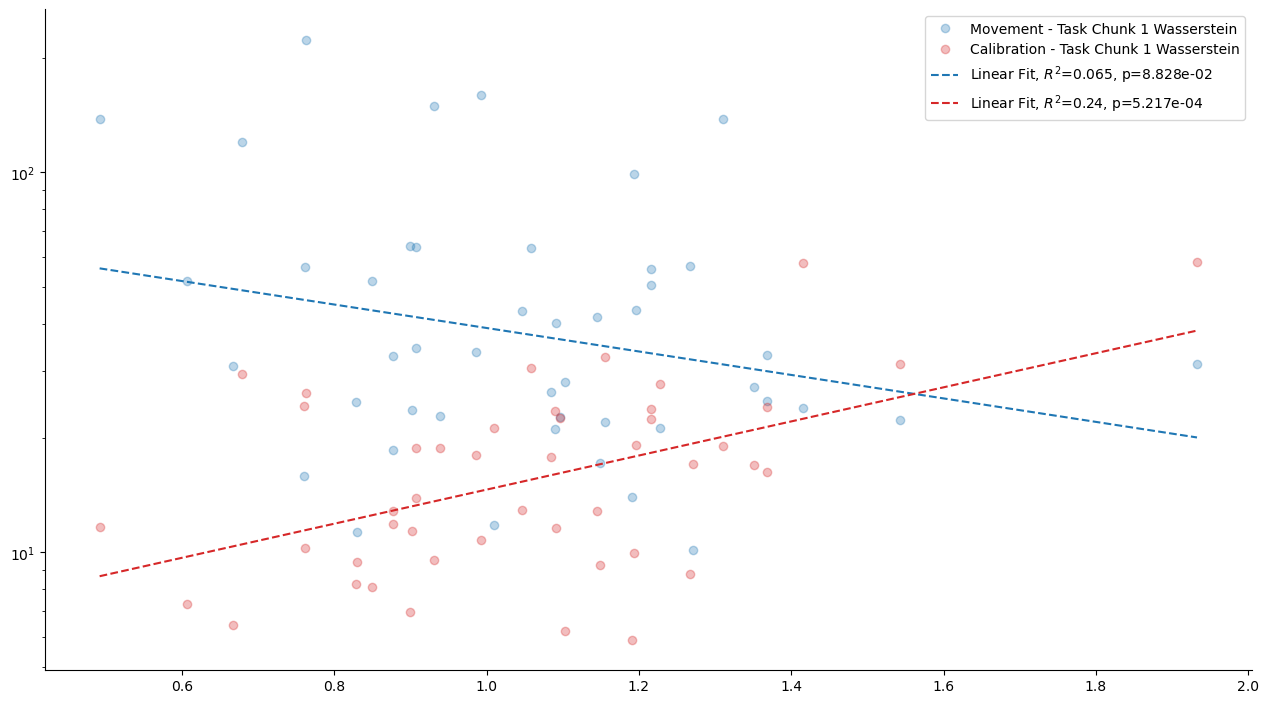

In [49]:
w2_fig, ax = plt.subplots(1,1)
w2_fig.tight_layout()

x = analysis.linspace(mean_rewards)
ax.semilogy(mean_rewards,movement_trial_distances,"o",color="tab:blue",label="Movement - Task Chunk 1 Wasserstein",alpha=0.3)
ax.semilogy(mean_rewards,calibration_trial_distances,"o",color="tab:red",label="Calibration - Task Chunk 1 Wasserstein",alpha=0.3)

r = analysis.linear_fit(mean_rewards,np.log(movement_trial_distances))
ax.plot(x, np.exp(r.intercept + r.slope*x),"--", color="tab:blue", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")

r = analysis.linear_fit(mean_rewards,np.log(calibration_trial_distances))
ax.plot(x, np.exp(r.intercept + r.slope*x),"--", color="tab:red", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")

# ax.set_ylabel("${W}_2$(Natural Movement, Block 1)")
# ax.set_ylim([0.5,12])
ax.legend()

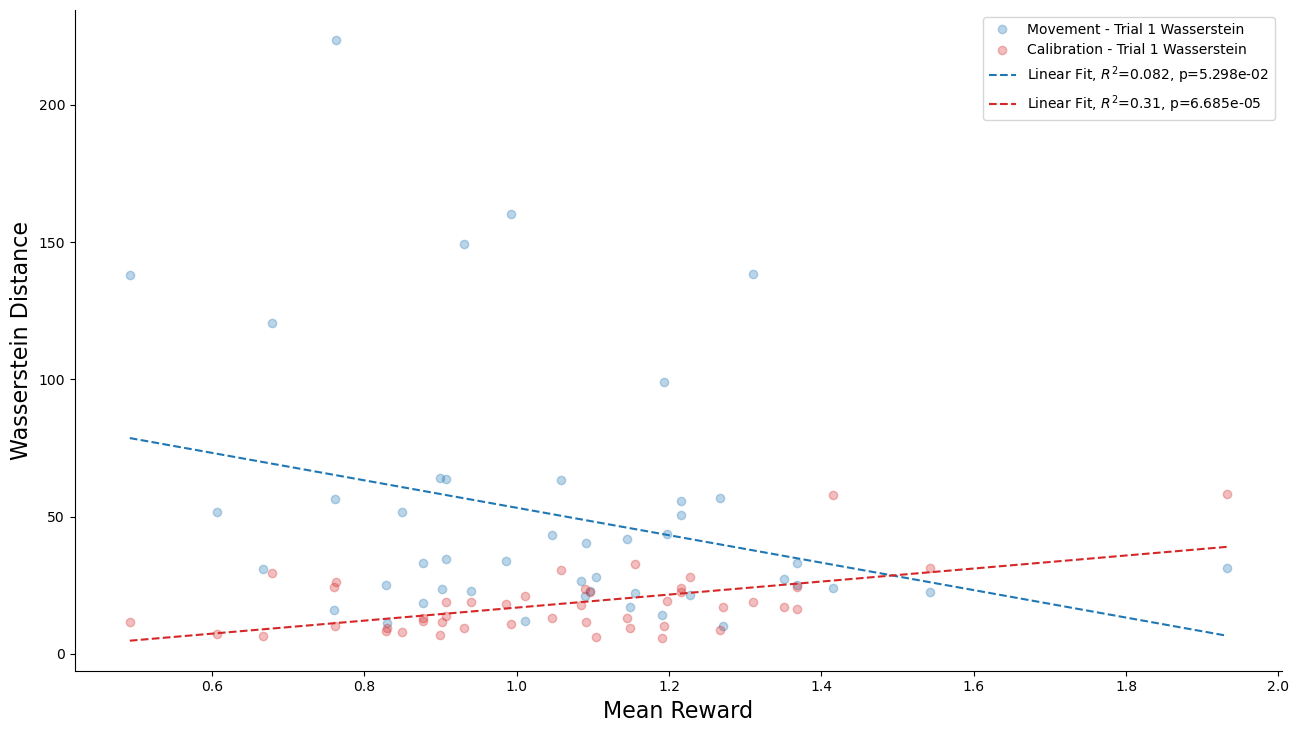

In [51]:
w2_fig, ax = plt.subplots(1,1)
w2_fig.tight_layout()

x = analysis.linspace(mean_rewards)
ax.plot(mean_rewards,movement_trial_distances,"o",color="tab:blue",label="Movement - Trial 1 Wasserstein",alpha=0.3)
ax.plot(mean_rewards,calibration_trial_distances,"o",color="tab:red",label="Calibration - Trial 1 Wasserstein",alpha=0.3)

r = analysis.linear_fit(mean_rewards,movement_trial_distances)
ax.plot(x, r.intercept + r.slope*x,"--", color="tab:blue", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")

r = analysis.linear_fit(mean_rewards,calibration_trial_distances)
ax.plot(x, r.intercept + r.slope*x,"--", color="tab:red", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")

ax.set_ylabel("Wasserstein Distance")
ax.set_xlabel("Mean Reward")
ax.legend()

In [56]:
plot.save_figure(w2_fig, "gmm_wasserstein", image_path)

Figure saved to /Users/spencer/phd/phd/images/more_results/gmms/gmm_wasserstein.pdf


## all model differences -- cut, looks weird

In [53]:
# subject_models = []
# for subject_idx in range(len(subjects)):
#     movement_models = model.load_log_movement_models(subject_idx)
#     calibration_models = model.load_log_calibration_models(subject_idx)
#     trial_models = model.load_log_trial_models(subject_idx)
#     log_models = movement_models + calibration_models + trial_models
#     models = [model.log_model(log_model) for log_model in log_models]
#     subject_models.append(models)

# subject_model_distances = []
# for models in subject_models:
#     model_distances = []
#     for model1, model2 in zip(models[:-1],models[1:]):
#         model_distances.append(model.gmm_wasserstein(model1.weights,model2.weights,model1.means,model2.means,model1.covariances,model2.covariances))
#     subject_model_distances.append(model_distances)
# subject_model_distances = np.array(subject_model_distances)
# subject_model_distances.shape

In [54]:
# w2_fig, ax = plt.subplots(1,1,figsize=(16*.8,12))
# w2_fig.tight_layout()
# # for mr, md in zip(mean_rewards, subject_model_distances):
# #     ax.plot([mr]*6,md,"ko",alpha=0.2)
# ax.semilogy(mean_rewards,np.median(subject_model_distances,axis=1),"ko",label="Median Wasserstein Differences")
# r = analysis.linear_fit(mean_rewards,np.log(np.median(subject_model_distances,axis=1)))
# x = analysis.linspace(mean_rewards)
# ax.plot(x, np.exp(r.intercept + r.slope*x),"--", color="tab:red", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")
# ax.set_ylabel("${W}_2$(Natural Movement, Block 1)")
# ax.set_ylim([0.5,12])
# ax.legend()

In [55]:
# plot.save_figure(w2_fig, "gmm_wasserstein", image_path)